<a href="https://colab.research.google.com/github/harshada0489/CookieBasedSessions/blob/main/CoronaVirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

plt.style.use('fivethirtyeight')
%matplotlib inline 

Importing the data sets

In [ ]:
#Importing the data sets
corona_confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
corona_deaths_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
corona_recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


In [ ]:
Retrive_Required_Dates_Columns = corona_confirmed_cases.keys()
print(Retrive_Required_Dates_Columns)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/4/20', '5/5/20', '5/6/20', '5/7/20', '5/8/20', '5/9/20', '5/10/20',
       '5/11/20', '5/12/20', '5/13/20'],
      dtype='object', length=117)


In [ ]:
#Retriving the date columns i.e from 22nd jan to last date i.e yesterday
confirmedCases_ForGivenDates = corona_confirmed_cases.loc[:, Retrive_Required_Dates_Columns[4]:Retrive_Required_Dates_Columns[-1]]
deathsCases_ForGivenDates = corona_deaths_cases.loc[:, Retrive_Required_Dates_Columns[4]:Retrive_Required_Dates_Columns[-1]]
recoveredCases_ForGivenDates = corona_recovered_cases.loc[:, Retrive_Required_Dates_Columns[4]:Retrive_Required_Dates_Columns[-1]]

In [ ]:
print(confirmedCases_ForGivenDates)

     1/22/20  1/23/20  1/24/20  1/25/20  ...  5/10/20  5/11/20  5/12/20  5/13/20
0          0        0        0        0  ...     4402     4687     4963     5226
1          0        0        0        0  ...      868      872      876      880
2          0        0        0        0  ...     5723     5891     6067     6253
3          0        0        0        0  ...      755      755      758      760
4          0        0        0        0  ...       45       45       45       45
..       ...      ...      ...      ...  ...      ...      ...      ...      ...
261        0        0        0        0  ...      208      208      208      220
262        0        0        0        0  ...       51       56       65       70
263        0        0        0        0  ...       11       11       11       11
264        0        0        0        0  ...      612      661      729      801
265        0        0        0        0  ...        0        0        0        1

[266 rows x 113 columns]


In [ ]:
print(deathsCases_ForGivenDates)

     1/22/20  1/23/20  1/24/20  1/25/20  ...  5/10/20  5/11/20  5/12/20  5/13/20
0          0        0        0        0  ...      120      122      127      132
1          0        0        0        0  ...       31       31       31       31
2          0        0        0        0  ...      502      507      515      522
3          0        0        0        0  ...       48       48       48       49
4          0        0        0        0  ...        2        2        2        2
..       ...      ...      ...      ...  ...      ...      ...      ...      ...
261        0        0        0        0  ...        5        5        5        6
262        0        0        0        0  ...        8        9       10       12
263        0        0        0        0  ...        1        1        1        1
264        0        0        0        0  ...       20       21       21       23
265        0        0        0        0  ...        0        0        0        0

[266 rows x 113 columns]


In [ ]:
print(recoveredCases_ForGivenDates)

     1/22/20  1/23/20  1/24/20  1/25/20  ...  5/10/20  5/11/20  5/12/20  5/13/20
0          0        0        0        0  ...      558      558      610      648
1          0        0        0        0  ...      650      654      682      688
2          0        0        0        0  ...     2678     2841     2998     3058
3          0        0        0        0  ...      550      550      568      576
4          0        0        0        0  ...       13       13       13       14
..       ...      ...      ...      ...  ...      ...      ...      ...      ...
248        0        0        0        0  ...        4        4        4        4
249        0        0        0        0  ...        1        1        1        1
250        0        0        0        0  ...        0        0        0        0
251        0        0        0        0  ...        0        0        0        0
252        0        0        0        0  ...        0        0        0        0

[253 rows x 113 columns]


In [ ]:
corona_Registered_Dates = confirmedCases_ForGivenDates.keys()
print(len(corona_Registered_Dates))
print(corona_Registered_Dates)

113
Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/4/20', '5/5/20', '5/6/20', '5/7/20', '5/8/20', '5/9/20', '5/10/20',
       '5/11/20', '5/12/20', '5/13/20'],
      dtype='object', length=113)


In [ ]:
TotalWorldCases_List = []
TotalDeathCases_List = [] 
TotalRecoveredCases_List = [] 



In [ ]:
#For each date sum of all confirmed/death/recovered cases are calculated for all countries
for i in corona_Registered_Dates:
  # For each date confirmed/death/recovered cases calculation for all countries
    TotalConfirmedCases_ForEachDate = confirmedCases_ForGivenDates[i].sum()
    TotalDeathCases_ForEachDate = deathsCases_ForGivenDates[i].sum()
    TotalRecoveredCases_ForEachDate = recoveredCases_ForGivenDates[i].sum()
    
    # confirmed, deaths, recovered, and active
    TotalWorldCases_List.append(TotalConfirmedCases_ForEachDate)
    TotalDeathCases_List.append(TotalDeathCases_ForEachDate)
    TotalRecoveredCases_List.append(TotalRecoveredCases_ForEachDate)

   
   

    

In [ ]:
print(TotalConfirmedCases_ForEachDate)

4347018


In [ ]:
print(TotalDeathCases_List)

[17, 18, 26, 42, 56, 82, 131, 133, 171, 213, 259, 362, 426, 492, 564, 634, 719, 806, 906, 1013, 1113, 1118, 1371, 1523, 1666, 1770, 1868, 2007, 2122, 2247, 2251, 2458, 2469, 2629, 2708, 2770, 2814, 2872, 2941, 2996, 3085, 3160, 3254, 3347, 3459, 3558, 3801, 3987, 4263, 4614, 4722, 5408, 5830, 6472, 7150, 7956, 8823, 9946, 11422, 13125, 14825, 16759, 19014, 21785, 24788, 28288, 31798, 35323, 39439, 44238, 49675, 55817, 61812, 67981, 73077, 78767, 86662, 93354, 100882, 108113, 114146, 119853, 125561, 132439, 140659, 147946, 156804, 163214, 167772, 173097, 180236, 186912, 193665, 199997, 206187, 209900, 214444, 220801, 227665, 233360, 238619, 243813, 247470, 251537, 257239, 263855, 269567, 274898, 279311, 282709, 286330, 291942, 297197]


In [ ]:
#Calculate daily increase of confirmed,deats and recovery
def CalculateDailyRiseOfCases(coronaCases):
        d = [] 
        for i in range(len(coronaCases)):
            if i == 0:
                d.append(coronaCases[0])
            else:
                d.append(coronaCases[i]-coronaCases[i-1])
        return d 


In [ ]:
DailyIncrease_ForWorldCases = CalculateDailyRiseOfCases(TotalWorldCases_List)


In [ ]:
print(DailyIncrease_ForWorldCases)

[555, 99, 287, 493, 684, 809, 2651, 588, 2068, 1693, 2111, 4749, 3094, 4011, 3743, 3159, 3597, 2729, 3030, 2612, 2040, 419, 15147, 6517, 2145, 2194, 2034, 1878, 503, 558, 622, 1753, 386, 603, 845, 982, 1358, 1366, 1899, 2358, 1937, 2534, 2280, 2766, 3915, 4046, 3974, 3769, 5030, 7255, 2477, 16871, 10895, 11352, 14154, 15510, 17741, 27756, 29632, 32317, 32438, 41264, 39824, 49645, 61971, 63737, 67394, 59437, 62210, 75108, 75042, 80827, 82416, 80166, 73684, 71693, 75002, 83794, 85323, 92395, 78082, 99113, 70015, 70406, 79858, 96368, 87842, 77609, 83544, 70940, 77319, 75562, 83795, 87328, 85409, 73893, 68689, 73507, 75058, 84623, 88648, 82026, 79145, 76326, 79636, 93378, 89649, 92346, 85945, 77690, 75803, 84245, 85271]


In [ ]:
# print(us_CalculateDailyRiseOfCases)

In [ ]:
# Transposing the N0.of days since jan 22nd 2020 till date from rows to columns, so as to make the data ready for prediction
RecordedCases_StartDate = np.array([i for i in range(len(corona_Registered_Dates))]).reshape(-1, 1)
TotalWorldCases_List = np.array(TotalWorldCases_List).reshape(-1, 1)
TotalDeathCases_List = np.array(TotalDeathCases_List).reshape(-1, 1)
TotalRecoveredCases_List = np.array(TotalRecoveredCases_List).reshape(-1, 1)


In [ ]:
print(RecordedCases_StartDate)

[[  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]
 [ 79]
 [ 80]
 [ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]]


In [ ]:
print(TotalWorldCases_List)

[[    555]
 [    654]
 [    941]
 [   1434]
 [   2118]
 [   2927]
 [   5578]
 [   6166]
 [   8234]
 [   9927]
 [  12038]
 [  16787]
 [  19881]
 [  23892]
 [  27635]
 [  30794]
 [  34391]
 [  37120]
 [  40150]
 [  42762]
 [  44802]
 [  45221]
 [  60368]
 [  66885]
 [  69030]
 [  71224]
 [  73258]
 [  75136]
 [  75639]
 [  76197]
 [  76819]
 [  78572]
 [  78958]
 [  79561]
 [  80406]
 [  81388]
 [  82746]
 [  84112]
 [  86011]
 [  88369]
 [  90306]
 [  92840]
 [  95120]
 [  97886]
 [ 101801]
 [ 105847]
 [ 109821]
 [ 113590]
 [ 118620]
 [ 125875]
 [ 128352]
 [ 145223]
 [ 156118]
 [ 167470]
 [ 181624]
 [ 197134]
 [ 214875]
 [ 242631]
 [ 272263]
 [ 304580]
 [ 337018]
 [ 378282]
 [ 418106]
 [ 467751]
 [ 529722]
 [ 593459]
 [ 660853]
 [ 720290]
 [ 782500]
 [ 857608]
 [ 932650]
 [1013477]
 [1095893]
 [1176059]
 [1249743]
 [1321436]
 [1396438]
 [1480232]
 [1565555]
 [1657950]
 [1736032]
 [1835145]
 [1905160]
 [1975566]
 [2055424]
 [2151792]
 [2239634]
 [2317243]
 [2400787]
 [2471727]
 [2549046]

In [ ]:
# print(TotalDeathCases_List)

In [ ]:
# print(TotalRecoveredCases_List)

In [ ]:
FutureDays_ToBePredicted = 30
Concat_PastNFutureDays = np.array([i for i in range(len(corona_Registered_Dates)+FutureDays_ToBePredicted)]).reshape(-1, 1)
DaysExcludingFuture = Concat_PastNFutureDays[:-30]

In [ ]:
# print(Concat_PastNFutureDays)

In [ ]:

from datetime import date 
# from datetime import datetime
  
def numOfDays(date1, date2): 
    return (date2-date1).days 
      
# Driver program 
date1 = date(2020, 1, 22) 
date2 = date.today() 

calnumoddays = numOfDays(date1, date2)
print(calnumoddays)

113


In [ ]:

BeginOfCorona = '1/22/2020'
Current_Day = calnumoddays - 1
Next_30Day = Current_Day + 30
BeginOfCorona_date = datetime.datetime.strptime(BeginOfCorona, '%m/%d/%Y')
Concat_PastNFutureDays_dates = []
for i in range(len(Concat_PastNFutureDays)):
    Concat_PastNFutureDays_dates.append((BeginOfCorona_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [ ]:
print(Current_Day)

112


In [ ]:
print(Next_30Day)

142


In [ ]:
print(len(TotalWorldCases_List))

113


In [ ]:
# print(len(RecordedCases_BeginOfCoronaDate))

In [ ]:
# Splitting the data into test set and train set
X_Train, X_Test, y_Train, y_Test = train_test_split(RecordedCases_StartDate, TotalWorldCases_List, test_size=0.34, shuffle=False) 

In [ ]:
# print(y_Train)

In [ ]:
# print(X_Test)

In [ ]:
# print(y_Test)

In [ ]:
# Creating the model

print('Creating the Regression Model - SVR')
SVR_Model = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=4, C=0.1)
SVR_Model.fit(X_Train, y_Train)


Creating the Regression Model - SVR


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.1, cache_size=200, coef0=0.0, degree=4, epsilon=1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

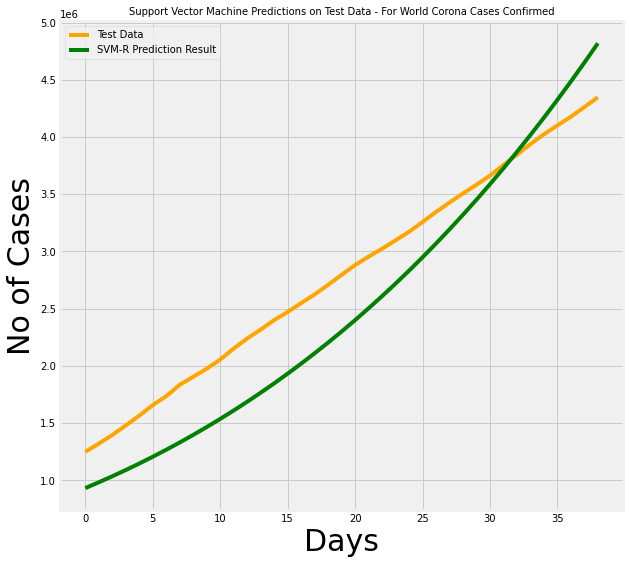

In [ ]:
# Predictions of test set y values by passing test set x values

SVR_TestDataPredictionResult = SVR_Model.predict(X_Test)
plt.figure(figsize=(9,9))

plt.title("Support Vector Machine Predictions on Test Data - For World Corona Cases Confirmed", size = 10)
plt.xlabel('Days', size=30)
plt.ylabel('No of Cases', size=30)
plt.plot(y_Test, color = 'orange')

plt.plot(SVR_TestDataPredictionResult, color = 'green')

plt.legend(['Test Data', 'SVM-R Prediction Result'])



In [ ]:
print(y_Test)
print(SVR_TestDataPredictionResult)

[[1249743]
 [1321436]
 [1396438]
 [1480232]
 [1565555]
 [1657950]
 [1736032]
 [1835145]
 [1905160]
 [1975566]
 [2055424]
 [2151792]
 [2239634]
 [2317243]
 [2400787]
 [2471727]
 [2549046]
 [2624608]
 [2708403]
 [2795731]
 [2881140]
 [2955033]
 [3023722]
 [3097229]
 [3172287]
 [3256910]
 [3345558]
 [3427584]
 [3506729]
 [3583055]
 [3662691]
 [3756069]
 [3845718]
 [3938064]
 [4024009]
 [4101699]
 [4177502]
 [4261747]
 [4347018]]
[ 932800.21066934  983272.70882874 1035804.99758126 1090452.36922275
 1147270.84839736 1206317.1920975  1267648.88966393 1331324.16278563
 1397401.96549992 1465941.98419238 1537004.63759689 1610651.07679563
 1686943.18521905 1765943.5786459  1847715.60520321 1932323.34536633
 2019831.61195885 2110305.9501527  2203812.63746806 2300418.68377342
 2400191.83128556 2503200.55456953 2609514.06053869 2719202.2884547
 2832335.90992746 2948986.32891522 3069225.68172447 3193126.83701004
 3320763.39577499 3452209.69137071 3587540.78949688 3726832.48820144
 3870161.31788065 4

In [ ]:
# Accuracy Measurement
print('SVR Accuracy Measurement')
print('Mean Absolute Error', mean_absolute_error(SVR_TestDataPredictionResult, y_Test))
print('Mean Squared Error:',mean_squared_error(SVR_TestDataPredictionResult, y_Test))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(SVR_TestDataPredictionResult, y_Test)))
# print('Mean Absolute Error:', mean_absolute_error(y_Test, SVR_TestDataPredictionResult))  
# print('Mean Squared Error:', metrics.mean_squared_error(y_Test, SVR_TestDataPredictionResult))  


SVR Accuracy Measurement
Mean Absolute Error 372064.8170850237
Mean Squared Error: 163469037418.67755
Root Mean Squared Error: 404313.04383939627


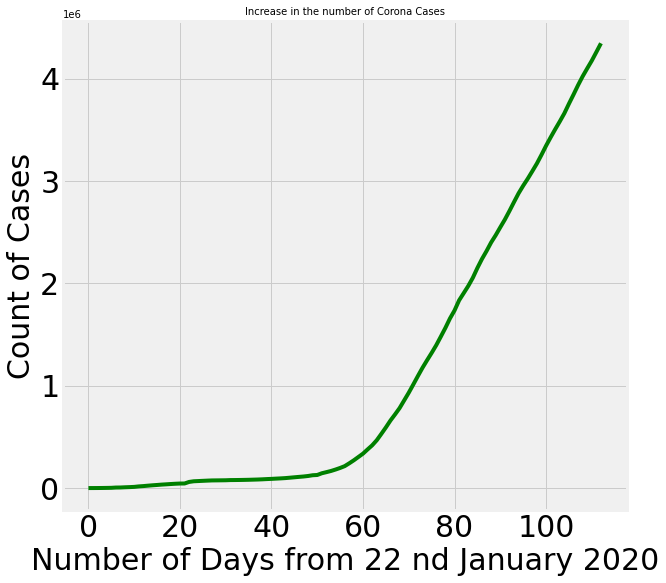

In [ ]:
#Line Graph To show the increase in the number of corona cases
DaysExcludingFuture = DaysExcludingFuture.reshape(1, -1)[0]
plt.figure(figsize=(9, 9))
plt.plot(DaysExcludingFuture, TotalWorldCases_List, color = 'green')
plt.title('Increase in the number of Corona Cases', size=10)
plt.xlabel('Number of Days from 22 nd January 2020', size=30)
plt.ylabel('Count of Cases', size=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.show()


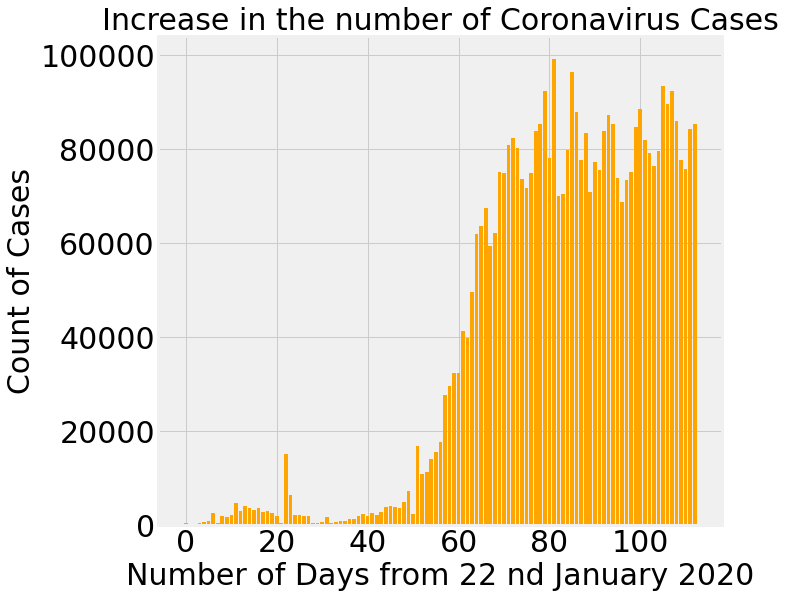

In [ ]:
#Bar Graph To show the increase in the number of corona cases

plt.figure(figsize=(9, 9))
plt.bar(DaysExcludingFuture, DailyIncrease_ForWorldCases, color = 'orange')
plt.title('Increase in the number of Coronavirus Cases', size=30)
plt.xlabel('Number of Days from 22 nd January 2020', size=30)
plt.ylabel('Count of Cases', size=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.show()

In [ ]:
# print('Actual Values')
# print(y_Test)

In [ ]:
# print('Predicted Values')
# print(SVR_TestDataPredictionResult.reshape(-1,1))

In [ ]:
print(Concat_PastNFutureDays[Current_Day:Next_30Day])

[[112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [138]
 [139]
 [140]
 [141]]


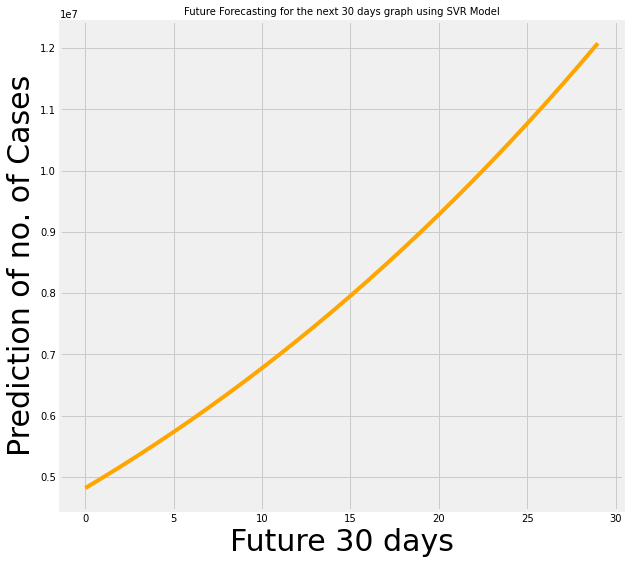

In [ ]:
#Future prediction for next 30 days
plt.figure(figsize=(9, 9))
plt.title("Future Forecasting for the next 30 days graph using SVR Model", size = 10)
plt.xlabel('Future 30 days', size=30)
plt.ylabel('Prediction of no. of Cases', size=30)
# newdates = Concat_PastNFutureDays[Current_Day:Next_30Day]
# newdates = newdates.reshape(1, -1)[0]
SVR_FutureDataPredictionResult = SVR_Model.predict(Concat_PastNFutureDays[Current_Day:Next_30Day])
plt.plot(SVR_FutureDataPredictionResult, color = 'orange')


In [ ]:
print(SVR_FutureDataPredictionResult)

[ 4819292.02449788  4993085.13935089  5171553.99288694  5354781.70663691
  5542852.13447992  5735849.86264343  5933860.20970311  6136969.22658302
  6345263.69655545  6558831.13524098  6777759.79060849  7002138.64297516
  7232057.40500642  7467606.52171606  7708877.17046608  7955961.26096683
  8208951.43527692  8467941.06780325  8733024.26530101  9004295.8668737
  9281851.44397309  9565787.30039923  9856200.4723005  10153188.72817353
 10456850.56886323 10767285.22756282 11084592.66981389 11408873.5935061
 11740229.42887767 12078762.33851494]


In [ ]:
# print(Concat_PastNFutureDays[Current_Day:Next_30Day])

In [ ]:
# print(len(DaysExcludingFuture))

In [ ]:
# print(Concat_PastNFutureDays_dates)

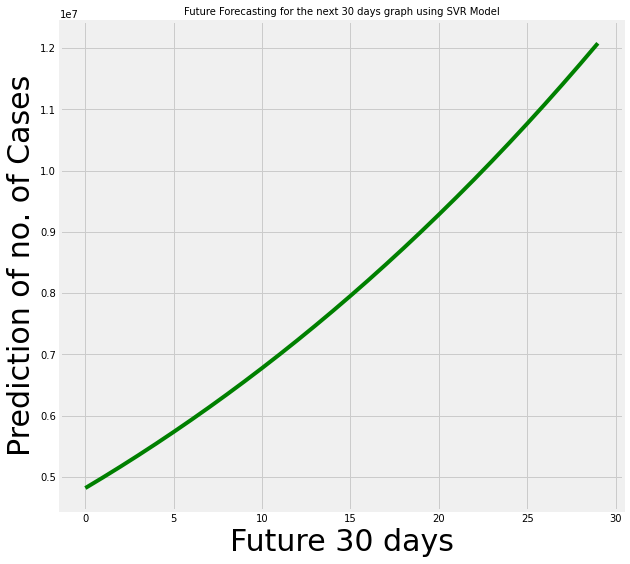

In [ ]:
#Line Graph To show the increase in the number of corona cases for future 30 days

newdates = Concat_PastNFutureDays[Current_Day:Next_30Day]
newdates = newdates.reshape(1, -1)[0]
plt.figure(figsize=(9, 9))
plt.plot(SVR_FutureDataPredictionResult, color = 'green')
plt.title('Future Forecasting for the next 30 days graph using SVR Model', size=10)
plt.xlabel('Future 30 days', size=30)
plt.ylabel('Prediction of no. of Cases', size=30)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [ ]:
print(Concat_PastNFutureDays[Current_Day:Next_30Day])
print(newdates)
# newdates = Concat_PastNFutureDays[Current_Day:Next_30Day] + 1

[[112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [138]
 [139]
 [140]
 [141]]
[112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141]


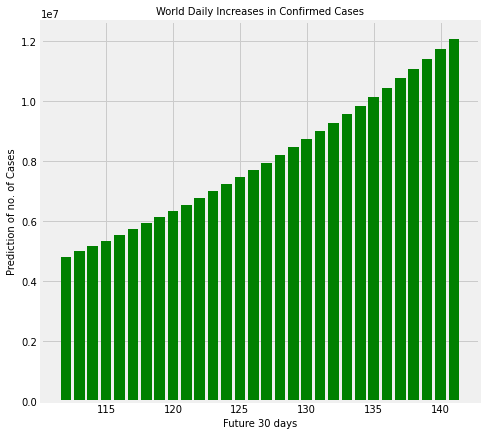

In [ ]:
#Bar Graph To show the increase in the number of corona cases for future 30 days

plt.figure(figsize=(7, 7))
plt.bar(newdates, SVR_FutureDataPredictionResult, color = 'green')
plt.title('World Daily Increases in Confirmed Cases', size=10)
plt.xlabel('Future 30 days', size=10)
plt.ylabel('Prediction of no. of Cases', size=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()
#########################################################################################################################################################
#########################################################################################################################################################
#########################################################################################################################################################

**###########################       PREDICTIONS FOR DEATHS######################**

In [ ]:
X_Train, X_Test, y_Train, y_Test = train_test_split(RecordedCases_StartDate, TotalDeathCases_List, test_size=0.43, shuffle=False) 
print('Creating the Regression Model - SVR - No.of deaths')
SVR_Model = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
SVR_Model.fit(X_Train, y_Train)


Creating the Regression Model - SVR - No.of deaths


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.1, cache_size=200, coef0=0.0, degree=5, epsilon=1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

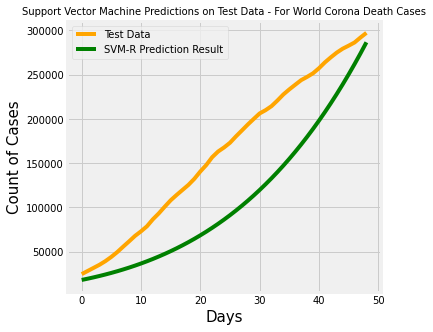

In [ ]:
SVR_TestDataPredictionResult = SVR_Model.predict(X_Test)
plt.figure(figsize=(5,5))

plt.title("Support Vector Machine Predictions on Test Data - For World Corona Death Cases", size = 10)
plt.xlabel('Days', size=15)
plt.ylabel('Count of Cases', size=15)
plt.plot(y_Test, color = 'orange')

plt.plot(SVR_TestDataPredictionResult, color = 'green')

plt.legend(['Test Data', 'SVM-R Prediction Result'])



In [ ]:
print(SVR_TestDataPredictionResult)
print(y_Test)

[ 18192.87836847  19596.11998621  21088.42368913  22673.96326696
  24357.0409187   26142.08919815  28033.67295983  30036.49130427
  32155.37952371  34395.31104771  36761.39938877  39258.90008789
  41893.21266009  44669.88254019  47594.60302825  50673.2172352
  53911.72002847  57316.25997759  60893.14129974  64648.82580525
  68589.93484364  72723.25124853  77055.72128378  81594.45658898
  86346.73612481  91320.00811866  96521.89201097 101960.18039928
 107642.84098587 113578.01852123 119774.03675111 126239.40036175
 132982.79692558 140013.09884609 147339.36530431 154970.8442042
 162916.97411794 171187.38623158 179791.90629099 188740.5565472
 198043.55770201 207711.33085354 217754.49944172 228183.89119446
 239010.54007279 250245.68821593 261900.7878881  273987.50342339
 286517.71317097]
[[ 24788]
 [ 28288]
 [ 31798]
 [ 35323]
 [ 39439]
 [ 44238]
 [ 49675]
 [ 55817]
 [ 61812]
 [ 67981]
 [ 73077]
 [ 78767]
 [ 86662]
 [ 93354]
 [100882]
 [108113]
 [114146]
 [119853]
 [125561]
 [132439]
 [140

In [ ]:
print('SVR Accuracy Measurement')
print('Mean Absolute Error', mean_absolute_error(SVR_TestDataPredictionResult, y_Test))
print('Mean Squared Error:',mean_squared_error(SVR_TestDataPredictionResult, y_Test))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(SVR_TestDataPredictionResult, y_Test)))

SVR Accuracy Measurement
Mean Absolute Error 53882.07244930577
Mean Squared Error: 3572900414.587698
Root Mean Squared Error: 59773.74352161405


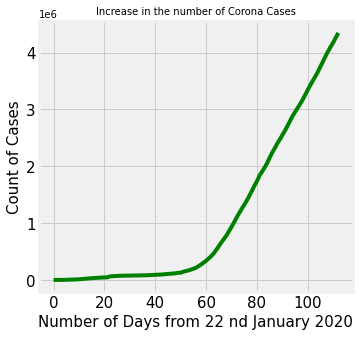

In [ ]:
# line graph
DaysExcludingFuture = DaysExcludingFuture.reshape(1, -1)[0]
plt.figure(figsize=(5, 5))
plt.plot(DaysExcludingFuture, TotalWorldCases_List, color = 'green')
plt.title('Increase in the number of Corona Cases', size=10)
plt.xlabel('Number of Days from 22 nd January 2020', size=15)
plt.ylabel('Count of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


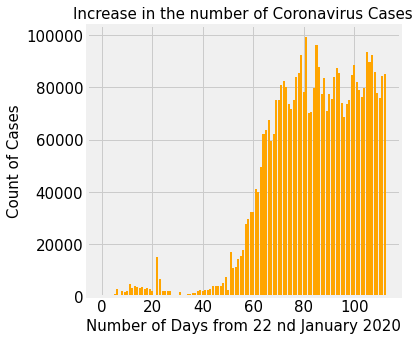

In [ ]:
# Bar Graph
plt.figure(figsize=(5, 5))
plt.bar(DaysExcludingFuture, DailyIncrease_ForWorldCases, color = 'orange')
plt.title('Increase in the number of Coronavirus Cases', size=15)
plt.xlabel('Number of Days from 22 nd January 2020', size=15)
plt.ylabel('Count of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

Text(0, 0.5, 'Count of Cases')

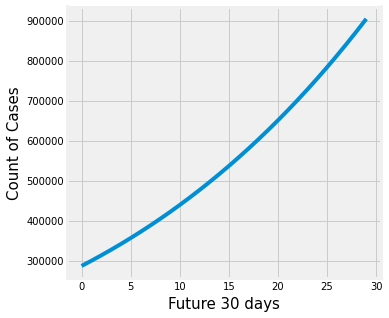

In [ ]:
# Print('Future Forecasting graph')
SVR_TestDataPredictionResult = SVR_Model.predict(Concat_PastNFutureDays[Current_Day:Next_30Day])
plt.figure(figsize=(5,5))
plt.plot(SVR_TestDataPredictionResult)
plt.xlabel('Future 30 days', size=15)
plt.ylabel('Count of Cases', size=15)

In [ ]:
print(SVR_TestDataPredictionResult)

[286517.71317097 299503.51144128 312957.21045276 326891.34227362
 341318.66077276 356252.14356106 371704.99393796 387690.64283993
 404222.75078126 421315.20980363 438982.14541962 457237.91855954
 476097.12751507 495574.60988873 515685.44453358 536444.95350473
 557868.70400094 579972.51031386 602772.43576848 626284.79467218
 650526.15426206 675513.33664679 701263.4207527  727793.74427288
 755121.90560847 783265.76581406 812243.45055079 842073.35202228
 872774.13092452 904364.71839302]


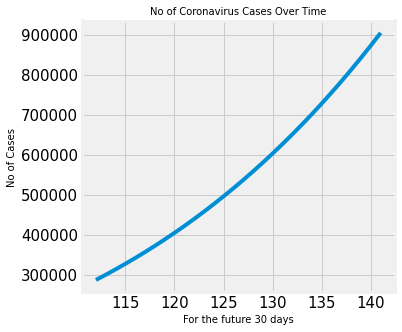

In [ ]:
#Graph for the next 30 days for number of deaths
newdates = Concat_PastNFutureDays[Current_Day:Next_30Day]
newdates = newdates.reshape(1, -1)[0]
plt.figure(figsize=(5, 5))
plt.plot(newdates, SVR_TestDataPredictionResult)
plt.title('No of Coronavirus Cases Over Time', size=10)
plt.xlabel('For the future 30 days', size=10)
plt.ylabel('No of Cases', size=10)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

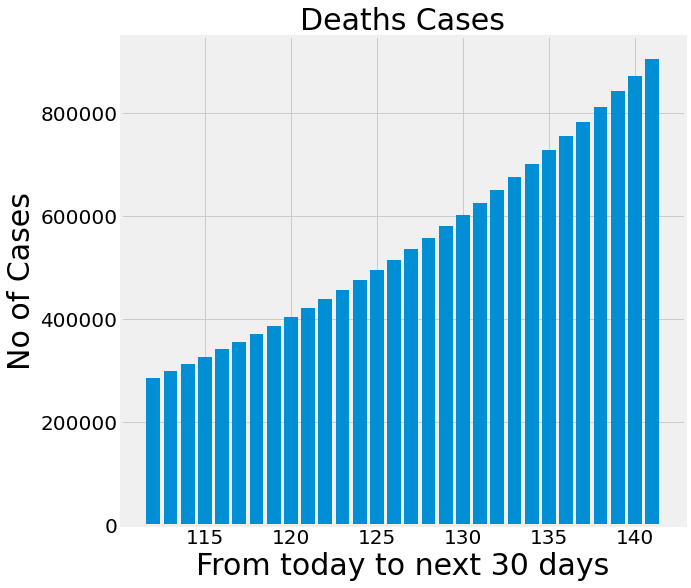

In [ ]:
plt.figure(figsize=(9, 9))
plt.bar(newdates, SVR_TestDataPredictionResult)
plt.title('Deaths Cases', size=30)
plt.xlabel('From today to next 30 days', size=30)
plt.ylabel('No of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


**###########################       PREDICTIONS FOR RECOVERIES ######################**



In [ ]:
X_Train, X_Test, y_Train, y_Test = train_test_split(RecordedCases_StartDate, TotalRecoveredCases_List, test_size=0.37, shuffle=False) 
print('Creating the Regression Model - SVR - No.of deaths')
SVR_Model = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
SVR_Model.fit(X_Train, y_Train)


Creating the Regression Model - SVR - No.of deaths


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.1, cache_size=200, coef0=0.0, degree=5, epsilon=1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

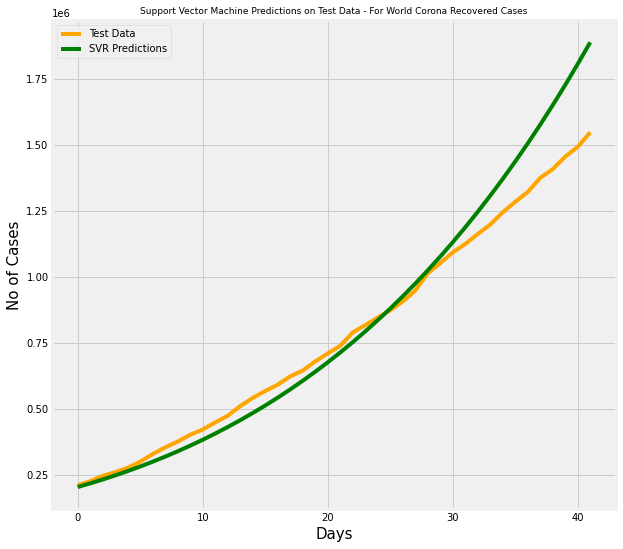

In [ ]:
SVR_TestDataPredictionResult = SVR_Model.predict(X_Test)
plt.figure(figsize=(9, 9))
plt.plot(y_Test, color = 'orange')
plt.plot(SVR_TestDataPredictionResult, color = 'green')
plt.title("Support Vector Machine Predictions on Test Data - For World Corona Recovered Cases", size = 9)
plt.xlabel('Days', size=15)
plt.ylabel('No of Cases', size=15)
plt.legend(['Test Data', 'SVR Predictions'])

In [ ]:
print(y_Test)
print(SVR_TestDataPredictionResult)

[[ 210269]
 [ 225814]
 [ 246152]
 [ 260023]
 [ 276534]
 [ 300054]
 [ 328703]
 [ 353989]
 [ 376104]
 [ 402120]
 [ 421722]
 [ 448672]
 [ 473980]
 [ 510516]
 [ 541592]
 [ 567765]
 [ 591719]
 [ 623307]
 [ 645308]
 [ 679905]
 [ 710046]
 [ 738980]
 [ 789585]
 [ 817405]
 [ 845985]
 [ 873677]
 [ 906955]
 [ 948425]
 [1013886]
 [1052415]
 [1093137]
 [1125236]
 [1162724]
 [1198832]
 [1245413]
 [1284741]
 [1322050]
 [1375624]
 [1408980]
 [1456209]
 [1493414]
 [1548547]]
[ 203636.5430209   217567.05830463  232293.3662069   247849.08523716
  264268.76766353  281587.91230402  299842.97731786  319071.39299634
  339311.57455448  360602.93492179  382985.89753394  406501.9091238
  431193.45251256  457104.05940058  484278.32315979  512761.91162346
  542601.57987856  573845.18305625  606541.68912336  640741.19167354
  676494.92271898  713855.26548062  752875.76717984  793611.15183053
  836117.33302935  880451.42674559  926671.76411637  974837.90423336
 1025010.64693737 1077252.04560756 1131625.41995367 118

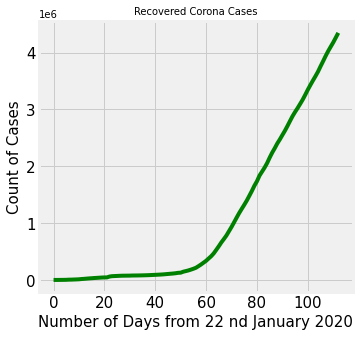

In [ ]:
#Line Graph for the since 22nd jan recovered
DaysExcludingFuture = DaysExcludingFuture.reshape(1, -1)[0]
plt.figure(figsize=(5, 5))
plt.plot(DaysExcludingFuture, TotalWorldCases_List, color = 'green')
plt.title('Recovered Corona Cases', size=10)
plt.xlabel('Number of Days from 22 nd January 2020', size=15)
plt.ylabel('Count of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


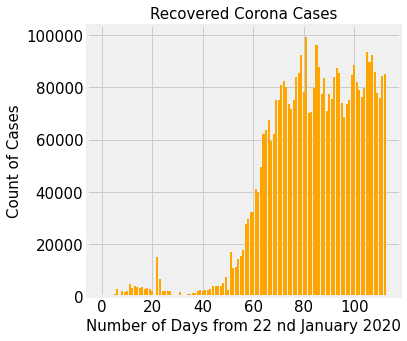

In [ ]:
# Bar Graph since 22nd jan 2020

plt.figure(figsize=(5, 5))
plt.bar(DaysExcludingFuture, DailyIncrease_ForWorldCases, color = 'orange')
plt.title('Recovered Corona Cases', size=15)
plt.xlabel('Number of Days from 22 nd January 2020', size=15)
plt.ylabel('Count of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

Text(0, 0.5, 'No of Cases')

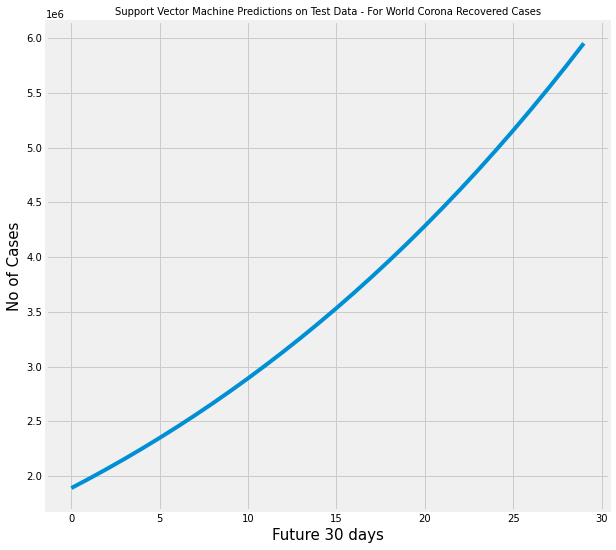

In [ ]:
# Print('Future Forecasting SVR')
SVR_TestDataPredictionResult = SVR_Model.predict(Concat_PastNFutureDays[Current_Day:Next_30Day])
plt.figure(figsize=(9, 9))
plt.plot(SVR_TestDataPredictionResult)
plt.title("Support Vector Machine Predictions on Test Data - For World Corona Recovered Cases", size = 10)
plt.xlabel('Future 30 days', size=15)
plt.ylabel('No of Cases', size=15)


In [ ]:
print(SVR_TestDataPredictionResult)

[1889858.377866   1975232.80187776 2063683.41384378 2155292.60517367
 2250144.22547724 2348323.59535118 2449917.51917609 2555014.29790291
 2663703.741847   2776077.18347808 2892227.49020996 3012249.07719472
 3136237.92011275 3264291.5679644  3396509.15585932 3532991.41780868
 3673840.69951751 3819160.97117665 3969057.84024849 4123638.56426647
 4283012.06361869 4447288.93434289 4616581.46091917 4791003.62905612
 4970671.13848724 5155701.41576078 5346213.62702718 5542328.69083645
 5744169.29092183 5951859.88899901]


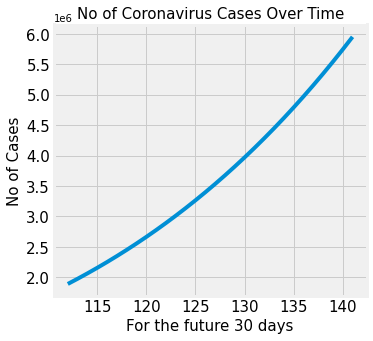

In [ ]:
#Line Graph for the next 30 days for number of deaths
newdates = Concat_PastNFutureDays[Current_Day:Next_30Day]
newdates = newdates.reshape(1, -1)[0]
plt.figure(figsize=(5, 5))
plt.plot(newdates, SVR_TestDataPredictionResult)
plt.title('No of Coronavirus Cases Over Time', size=15)
plt.xlabel('For the future 30 days', size=15)
plt.ylabel('No of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

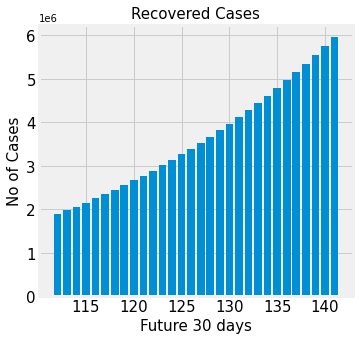

In [ ]:
plt.figure(figsize=(5, 5))
plt.bar(newdates, SVR_TestDataPredictionResult)
plt.title('Recovered Cases', size=15)
plt.xlabel('Future 30 days', size=15)
plt.ylabel('No of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

  **###################           Predictions for USA.        **









In [ ]:
us_confirmed_dates = corona_confirmed_cases.loc[:, Retrive_Required_Dates_Columns[4]:Retrive_Required_Dates_Columns[-1]]
us_confirmed_dates_keys = us_confirmed_dates.keys()
print(us_confirmed_dates_keys)
days_since_feb = np.array([i for i in range(len(us_confirmed_dates_keys))]).reshape(-1, 1)


Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/4/20', '5/5/20', '5/6/20', '5/7/20', '5/8/20', '5/9/20', '5/10/20',
       '5/11/20', '5/12/20', '5/13/20'],
      dtype='object', length=113)


In [ ]:
# print(len(days_since_feb))

[[105]
 [ 10]
 [ 24]
 [  7]
 [108]
 [ 56]
 [ 63]
 [ 76]
 [ 26]
 [  2]
 [ 91]
 [ 45]
 [ 54]
 [ 93]
 [104]
 [ 71]
 [ 97]
 [ 16]
 [ 13]
 [ 22]
 [ 84]
 [ 89]
 [ 30]]


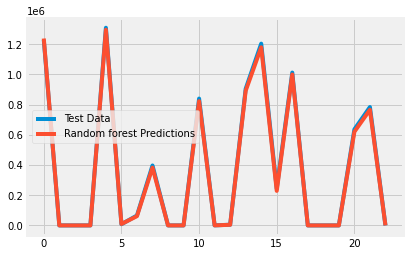

In [ ]:


us_cases = [] 
us_deaths = [] 
us_recoveries = [] 


for i in us_confirmed_dates_keys:
   # case studies 
    us_cases.append(corona_confirmed_cases[corona_confirmed_cases['Country/Region']=='US'][i].sum())
    us_deaths.append(corona_deaths_cases[corona_deaths_cases['Country/Region']=='US'][i].sum())
    us_recoveries.append(corona_recovered_cases[corona_recovered_cases['Country/Region']=='US'][i].sum())

us_CalculateDailyRiseOfCases = CalculateDailyRiseOfCases(us_cases)
us_daily_death = CalculateDailyRiseOfCases(us_deaths)
us_daily_recovery = CalculateDailyRiseOfCases(us_recoveries)


# bayesian_poly = PolynomialFeatures(degree=6)
# bayesian_poly_X_Train = bayesian_poly.fit_transform(X_Train)
# bayesian_poly_X_Test = bayesian_poly.fit_transform(X_Test)
# bayesian_poly_Concat_PastNFutureDays = bayesian_poly.fit_transform(Concat_PastNFutureDays)


# # polynomial regression
# linear_model = LinearRegression(normalize=True, fit_intercept=False)
# linear_model.fit(poly_X_Train, y_Train)
# test_linear_pred = linear_model.predict(poly_X_Test)
# linear_pred = linear_model.predict(poly_Concat_PastNFutureDays)
# print('MAE:', mean_absolute_error(test_linear_pred, y_Test))
# print('MSE:',mean_squared_error(test_linear_pred, y_Test))


X_Train, X_Test, y_Train, y_Test = train_test_split(days_since_feb, us_cases, test_size=0.20, random_state = 0)
print(X_Test)
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)
regressor.fit(X_Train, y_Train)

regression_pred = regressor.predict(X_Test)
plt.plot(y_Test)
plt.plot(regression_pred)

plt.legend(['Test Data', 'Random forest Predictions'])

# X_grid = np.arange(min(X_Train), max(X_Train), 0.01)
# X_grid = X_grid.reshape((len(X_grid), 1))
# plt.scatter(X_Train, y_Train, color = 'red')
# plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
# plt.title('# of Coronavirus Cases Over Time in USA', size=30)
# plt.xlabel('Till date', size=30)
# plt.ylabel('# of Cases', size=30)
# plt.show()



In [ ]:
us_cases

[1,
 1,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 7,
 8,
 8,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 15,
 15,
 15,
 51,
 51,
 57,
 58,
 60,
 68,
 74,
 98,
 118,
 149,
 217,
 262,
 402,
 518,
 583,
 959,
 1281,
 1663,
 2179,
 2727,
 3499,
 4632,
 6421,
 7783,
 13747,
 19273,
 25600,
 33276,
 43843,
 53736,
 65778,
 83836,
 101657,
 121465,
 140909,
 161831,
 188172,
 213242,
 243622,
 275367,
 308650,
 336802,
 366317,
 397121,
 428654,
 462780,
 496535,
 526396,
 555313,
 580619,
 607670,
 636350,
 667592,
 699706,
 732197,
 758809,
 784326,
 811865,
 840351,
 869170,
 905358,
 938154,
 965785,
 988197,
 1012582,
 1039909,
 1069424,
 1103461,
 1132539,
 1158040,
 1180375,
 1204351,
 1229331,
 1257023,
 1283929,
 1309550,
 1329260,
 1347881,
 1369376,
 1390406]

In [ ]:
print(regression_pred)
print(y_Test)


[1.23819327e+06 7.17700000e+00 1.28960000e+01 5.05200000e+00
 1.29621548e+06 9.20169000e+03 6.14494510e+04 3.83173017e+05
 1.30040000e+01 1.41300000e+00 8.23190289e+05 3.19680000e+02
 4.12337000e+03 8.92163950e+05 1.18007399e+06 2.28878555e+05
 9.99931832e+05 1.10010000e+01 1.07340000e+01 1.21930000e+01
 6.20373211e+05 7.66120270e+05 1.37880000e+01]
[1229331, 8, 13, 5, 1309550, 7783, 65778, 397121, 13, 2, 840351, 402, 4632, 905358, 1204351, 243622, 1012582, 11, 11, 13, 636350, 784326, 15]


[1378538.095 1378538.095 1378538.095 1378538.095 1378538.095 1378538.095
 1378538.095 1378538.095 1378538.095 1378538.095 1378538.095 1378538.095
 1378538.095 1378538.095 1378538.095 1378538.095 1378538.095 1378538.095
 1378538.095 1378538.095 1378538.095 1378538.095 1378538.095 1378538.095
 1378538.095 1378538.095 1378538.095 1378538.095 1378538.095 1378538.095]


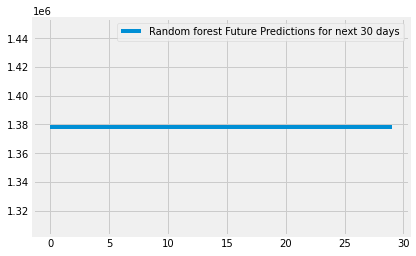

In [ ]:
reg_pred = regressor.predict(Concat_PastNFutureDays[Current_Day:Next_30Day])
plt.plot(reg_pred)
plt.legend(['Random forest Future Predictions for next 30 days'])
print(reg_pred)

In [ ]:
# X_grid = np.arange(min(X_Test), max(X_Test), 0.01)
# X_grid = X_grid.reshape((len(X_grid), 1))
# plt.scatter(X_Test, y_Test, color = 'red')
# plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
# plt.title('# of Coronavirus Cases Over Time in USA', size=30)
# plt.xlabel('Till date', size=30)
# plt.ylabel('# of Cases', size=30)
# plt.show()



In [ ]:
# print(regressor.predict(X_grid))

In [ ]:
# print(y_Test)


In [ ]:
# plt.plot(y_Test)
# plt.plot(SVR_TestDataPredictionResult)
# plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [ ]:

# #Graph for the next 10 days for number of deaths
# newdates = Concat_PastNFutureDays[90:105]
# newdates = newdates.reshape(1, -1)[0]
# plt.figure(figsize=(16, 9))
# plt.plot(newdates, SVR_TestDataPredictionResult)
# plt.title('# of Coronavirus Cases Over Time in USA', size=30)
# plt.xlabel('For the future 30 days', size=30)
# plt.ylabel('# of Cases', size=30)
# plt.xticks(size=20)
# plt.yticks(size=20)
# plt.show()

# plt.figure(figsize=(16, 9))
# plt.bar(newdates, SVR_TestDataPredictionResult)
# plt.title('Number of Cases in USA for future 30 days', size=30)
# plt.xlabel('From today to next 30 days', size=30)
# plt.ylabel('# of Cases', size=30)
# plt.xticks(size=20)
# plt.yticks(size=20)
# plt.show()

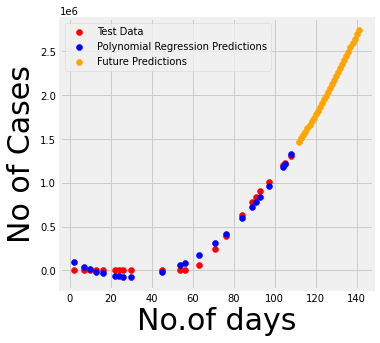

In [ ]:
#Polynomial Regression
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_Train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_Train)

plt.figure(figsize=(5, 5))

# Actual values for testing part
plt.scatter(X_Test, y_Test, color='red')
# Prediction values for test part
plt.scatter(X_Test, pol_reg.predict(poly_reg.fit_transform(X_Test)), color='blue')
# Predictions for future 30 days
plt.scatter(Concat_PastNFutureDays[Current_Day:Next_30Day], pol_reg.predict(poly_reg.fit_transform(Concat_PastNFutureDays[Current_Day:Next_30Day])), color='orange')

# plt.title('Recovered Cases', size=30)
plt.xlabel('No.of days', size=30)
plt.ylabel('No of Cases', size=30)
plt.legend(['Test Data', 'Polynomial Regression Predictions', 'Future Predictions'])

plt.show()


In [ ]:
print("present")
print(y_Test)

print("prediction")

print(pol_reg.predict(poly_reg.fit_transform(X_Test)))

print("future")


print(pol_reg.predict(poly_reg.fit_transform(Concat_PastNFutureDays[Current_Day:Next_30Day])))


present
[1229331, 8, 13, 5, 1309550, 7783, 65778, 397121, 13, 2, 840351, 402, 4632, 905358, 1204351, 243622, 1012582, 11, 11, 13, 636350, 784326, 15]
prediction
[1218021.80214646   10302.22088076  -68974.65559161   38859.86444242
 1322856.47189332   83755.55395135  179097.43275354  415143.91763824
  -73040.47803686   95530.24407297  782785.47014315  -21149.57866453
   60598.45531323  839517.50478409 1183984.34293362  315282.50103941
  958426.15828265  -34562.75175503  -14171.98451839  -63093.9717408
  598515.38246862  727868.29690776  -75727.53871068]
future
[1468988.04647524 1506655.2284992  1544776.12587454 1583350.73860128
 1622379.0666794  1661861.11010892 1701796.86888982 1742186.34302211
 1783029.5325058  1824326.43734087 1866077.05752733 1908281.39306518
 1950939.44395442 1994051.21019505 2037616.69178707 2081635.88873048
 2126108.80102527 2171035.42867146 2216415.77166904 2262249.83001801
 2308537.60371836 2355279.09277011 2402474.29717324 2450123.21692777
 2498225.85203368 254